<a href="https://colab.research.google.com/github/Gaurav-Negi142/web-scraping-form-JustWatch/blob/main/Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install pandas
!pip install numpy
!pip install selenium


In [ ]:
#import all necessary labraries
import requests
import json
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from urllib.parse import urljoin

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())



<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
url = "https://www.justwatch.com/in/movies?release_year_from=2000"
soup=fetch_movie_urls(url)
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
sorted_url_list = sorted(set(url_list))
print(sorted_url_list)
print(len(sorted_url_list))


['https://www.justwatch.com/in/movie/28-days-later', 'https://www.justwatch.com/in/movie/28-years-later', 'https://www.justwatch.com/in/movie/365-days', 'https://www.justwatch.com/in/movie/3bhk', 'https://www.justwatch.com/in/movie/aashiqui-2', 'https://www.justwatch.com/in/movie/amateur-2024', 'https://www.justwatch.com/in/movie/american-kamasutra', 'https://www.justwatch.com/in/movie/babygirl-2024', 'https://www.justwatch.com/in/movie/ballerina-2024', 'https://www.justwatch.com/in/movie/bhaag-milkha-bhaag', 'https://www.justwatch.com/in/movie/black-bag', 'https://www.justwatch.com/in/movie/bring-her-back', 'https://www.justwatch.com/in/movie/chaava', 'https://www.justwatch.com/in/movie/chennai-express', 'https://www.justwatch.com/in/movie/children-of-the-salt', 'https://www.justwatch.com/in/movie/companion-2025', 'https://www.justwatch.com/in/movie/coolie-2025', 'https://www.justwatch.com/in/movie/dangal', 'https://www.justwatch.com/in/movie/demon-slayer-kimetsu-no-yaiba-infinity-cas

## **Scrapping Movie Title**

In [ ]:
movie_titles_dict = dict()
movie_titles_list = []
for i in sorted_url_list:
  name = i.replace('https://www.justwatch.com/in/movie/','')
  name = name.title().replace('-',' ')
  movie_titles_list.append(name)
  movie_titles_dict[i] = name
print(movie_titles_dict)
print(len(movie_titles_dict))

{'https://www.justwatch.com/in/movie/28-days-later': '28 Days Later', 'https://www.justwatch.com/in/movie/28-years-later': '28 Years Later', 'https://www.justwatch.com/in/movie/365-days': '365 Days', 'https://www.justwatch.com/in/movie/3bhk': '3Bhk', 'https://www.justwatch.com/in/movie/aashiqui-2': 'Aashiqui 2', 'https://www.justwatch.com/in/movie/amateur-2024': 'Amateur 2024', 'https://www.justwatch.com/in/movie/american-kamasutra': 'American Kamasutra', 'https://www.justwatch.com/in/movie/babygirl-2024': 'Babygirl 2024', 'https://www.justwatch.com/in/movie/ballerina-2024': 'Ballerina 2024', 'https://www.justwatch.com/in/movie/bhaag-milkha-bhaag': 'Bhaag Milkha Bhaag', 'https://www.justwatch.com/in/movie/black-bag': 'Black Bag', 'https://www.justwatch.com/in/movie/bring-her-back': 'Bring Her Back', 'https://www.justwatch.com/in/movie/chaava': 'Chaava', 'https://www.justwatch.com/in/movie/chennai-express': 'Chennai Express', 'https://www.justwatch.com/in/movie/children-of-the-salt': 'C

## **Scrapping release Year**

In [ ]:
# Write Your Code here
seen = set()
release_year_dict = {}

for url in url_list:
    soup = fetch_movie_urls(url)
    release_year = soup.find('span', class_="release-year")

    if release_year:
        year = release_year.text.strip("()")
        identifier = f"{url}-{year}"

        if identifier not in seen:
            seen.add(identifier)
            release_year_dict[url] = year   # Store as key-value pair

print(release_year_dict)
print(f"Total entries: {len(release_year_dict)}")



{'https://www.justwatch.com/in/movie/saiyaara': '2025', 'https://www.justwatch.com/in/movie/raid-2-2025': '2025', 'https://www.justwatch.com/in/movie/jurassic-world-4': '2025', 'https://www.justwatch.com/in/movie/sitaare-zameen-par': '2025', 'https://www.justwatch.com/in/movie/housefull-5': '2025', 'https://www.justwatch.com/in/movie/war-2': '2025', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': '2025', 'https://www.justwatch.com/in/movie/materialists': '2025', 'https://www.justwatch.com/in/movie/mon-potongo': '2024', 'https://www.justwatch.com/in/movie/gagana-maargan': '2025', 'https://www.justwatch.com/in/movie/superman-2025': '2025', 'https://www.justwatch.com/in/movie/365-days': '2020', 'https://www.justwatch.com/in/movie/f1': '2025', 'https://www.justwatch.com/in/movie/28-years-later': '2025', 'https://www.justwatch.com/in/movie/chaava': '2025', 'https://www.justwatch.com/in/movie/kubera-2025': '2025', 'https://www.justwatch.com/in/movie/how-to-tr

## **Scrapping Genres**

In [ ]:
# Write Your Code here
seen = set()
genres_dict = {}

# Define a list of common genres to detect real genre strings
known_genres = [
    'Crime','History','Romance','Western','Made in Europe','Action','Adventure',
    'Animation','Fantasy','Kids','Family','Science-Fiction','War & Military',
    'Reality TV','Documentary','Horror','Music & Musical','Mystery & Thriller',
    'Comedy','Drama','Sport'
]

for url in url_list:
    soup = fetch_movie_urls(url)
    genre_tag = soup.find('span', string=lambda text: text and ',' in text and len(text) > 4)

    if genre_tag:
        genre = genre_tag.get_text(strip=True)

        # Check if genre contains at least one known genre word
        if any(g.lower() in genre.lower() for g in known_genres):
            identifier = f"{url}-{genre}"
            if identifier not in seen:
                seen.add(identifier)
                genres_dict[url] = genre  # store as key-value

print(genres_dict)
print(len(genres_dict))


{'https://www.justwatch.com/in/movie/saiyaara': 'Romance, Drama', 'https://www.justwatch.com/in/movie/raid-2-2025': 'Animation, Action & Adventure, Drama, Fantasy', 'https://www.justwatch.com/in/movie/sitaare-zameen-par': 'Sport, Comedy, Drama', 'https://www.justwatch.com/in/movie/housefull-5': 'Mystery & Thriller, Comedy', 'https://www.justwatch.com/in/movie/war-2': 'Mystery & Thriller, Action & Adventure', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': 'Action & Adventure, Mystery & Thriller', 'https://www.justwatch.com/in/movie/materialists': 'Romance, Drama, Comedy', 'https://www.justwatch.com/in/movie/mon-potongo': 'Drama, Romance', 'https://www.justwatch.com/in/movie/gagana-maargan': 'Crime, Mystery & Thriller', 'https://www.justwatch.com/in/movie/365-days': 'Romance, Drama, Made in Europe', 'https://www.justwatch.com/in/movie/chaava': 'History, Action & Adventure, Drama', 'https://www.justwatch.com/in/movie/kubera-2025': 'Mystery & Thriller, Dra

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
seen = set()
imdb_rating_dict = {}

for url in url_list:
    soup = fetch_movie_urls(url)
    ratings = soup.find('span', class_="imdb-score")

    if ratings:
        imdb_rating = ratings.text.strip("()")
        identifier = f"{url}-{imdb_rating}"

        if identifier not in seen:
            seen.add(identifier)
            imdb_rating_dict[url] = imdb_rating  # store as key-value

print(imdb_rating_dict)
print(len(imdb_rating_dict))


{'https://www.justwatch.com/in/movie/saiyaara': '10.0 (201', 'https://www.justwatch.com/in/movie/raid-2-2025': '9.2 (32k', 'https://www.justwatch.com/in/movie/jurassic-world-4': '6.0 (116k', 'https://www.justwatch.com/in/movie/sitaare-zameen-par': '6.9 (29k', 'https://www.justwatch.com/in/movie/housefull-5': '3.4 (16k', 'https://www.justwatch.com/in/movie/war-2': '6.0 (27k', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': '7.3 (134k', 'https://www.justwatch.com/in/movie/materialists': '6.4 (42k', 'https://www.justwatch.com/in/movie/mon-potongo': '4.7 (835', 'https://www.justwatch.com/in/movie/gagana-maargan': '6.8 (2.7k', 'https://www.justwatch.com/in/movie/superman-2025': '7.3 (245k', 'https://www.justwatch.com/in/movie/365-days': '3.3 (105k', 'https://www.justwatch.com/in/movie/f1': '7.8 (160k', 'https://www.justwatch.com/in/movie/28-years-later': '6.7 (115k', 'https://www.justwatch.com/in/movie/chaava': '7.3 (36k', 'https://www.justwatch.com/in/movie

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
seen = set()
runtime_dict = {}

for url in url_list:
    soup = fetch_movie_urls(url)
    info_divs = soup.find_all('div', class_="poster-detail-infos__value")

    runtime = None
    for div_rt in info_divs:
        text = div_rt.get_text(strip=True).lower()
        if 'h' in text and 'min' in text:
            runtime = text
            break

    if runtime:
        identifier = f"{url}-{runtime}"
        if identifier not in seen:
            seen.add(identifier)
            runtime_dict[url] = runtime

print(runtime_dict)
print(len(runtime_dict))


{'https://www.justwatch.com/in/movie/saiyaara': '2h 36min', 'https://www.justwatch.com/in/movie/raid-2-2025': '2h 10min', 'https://www.justwatch.com/in/movie/jurassic-world-4': '2h 13min', 'https://www.justwatch.com/in/movie/sitaare-zameen-par': '2h 35min', 'https://www.justwatch.com/in/movie/housefull-5': '2h 43min', 'https://www.justwatch.com/in/movie/war-2': '2h 53min', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': '2h 50min', 'https://www.justwatch.com/in/movie/materialists': '1h 56min', 'https://www.justwatch.com/in/movie/mon-potongo': '2h 29min', 'https://www.justwatch.com/in/movie/gagana-maargan': '2h 12min', 'https://www.justwatch.com/in/movie/superman-2025': '2h 10min', 'https://www.justwatch.com/in/movie/365-days': '1h 54min', 'https://www.justwatch.com/in/movie/f1': '2h 36min', 'https://www.justwatch.com/in/movie/28-years-later': '1h 55min', 'https://www.justwatch.com/in/movie/chaava': '2h 41min', 'https://www.justwatch.com/in/movie/kubera-

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
seen = set()
age_rating_dict = {}
for url in url_list:
    soup = fetch_movie_urls(url)
    info_divs = soup.find_all('div', class_="poster-detail-infos__value")

    age_rating = None
    for div in info_divs:
        text = div.get_text(strip=True).upper()

        # Filter for age rating only — safe and strict
        if text.startswith(('U', 'A')) and len(text) <= 6:
            age_rating = text
            break

    if age_rating:
        identifier = f"{url}-{age_rating}"
        if identifier not in seen:
            seen.add(identifier)
            age_rating_dict[url] = age_rating  # key=url, value=age_rating

print(age_rating_dict)
print(len(age_rating_dict))



{'https://www.justwatch.com/in/movie/saiyaara': 'UA16+', 'https://www.justwatch.com/in/movie/raid-2-2025': 'UA13+', 'https://www.justwatch.com/in/movie/jurassic-world-4': 'UA13+', 'https://www.justwatch.com/in/movie/sitaare-zameen-par': 'UA13+', 'https://www.justwatch.com/in/movie/housefull-5': 'UA16+', 'https://www.justwatch.com/in/movie/war-2': 'UA16+', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': 'UA13+', 'https://www.justwatch.com/in/movie/materialists': 'A', 'https://www.justwatch.com/in/movie/mon-potongo': 'A', 'https://www.justwatch.com/in/movie/gagana-maargan': 'UA13+', 'https://www.justwatch.com/in/movie/superman-2025': 'UA13+', 'https://www.justwatch.com/in/movie/365-days': 'A', 'https://www.justwatch.com/in/movie/f1': 'UA16+', 'https://www.justwatch.com/in/movie/28-years-later': 'A', 'https://www.justwatch.com/in/movie/chaava': 'A', 'https://www.justwatch.com/in/movie/kubera-2025': 'UA16+', 'https://www.justwatch.com/in/movie/how-to-train-

## **Fetching Production Countries Details**

In [ ]:
!pip install pycountry

In [ ]:
# Write Your Code here
import pycountry

valid_countries = {country.name for country in pycountry.countries}
seen = set()
production_countries_dict = {}

for url in url_list:
    soup = fetch_movie_urls(url)
    info_divs = soup.find_all('div', class_="poster-detail-infos__value")
    production_country = None

    for div in info_divs:
        text = div.get_text(strip=True)

        # Match with official country names
        if text in valid_countries:
            production_country = text
            break

    if production_country:
        identifier = f"{url}-{production_country}"
        if identifier not in seen:
            seen.add(identifier)
            production_countries_dict[url] = production_country

print(production_countries_dict)
print(len(production_countries_dict))



{'https://www.justwatch.com/in/movie/saiyaara': 'India', 'https://www.justwatch.com/in/movie/raid-2-2025': 'India', 'https://www.justwatch.com/in/movie/sitaare-zameen-par': 'India', 'https://www.justwatch.com/in/movie/war-2': 'India', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': 'United States', 'https://www.justwatch.com/in/movie/mon-potongo': 'India', 'https://www.justwatch.com/in/movie/gagana-maargan': 'India', 'https://www.justwatch.com/in/movie/superman-2025': 'United States', 'https://www.justwatch.com/in/movie/365-days': 'Poland', 'https://www.justwatch.com/in/movie/f1': 'United States', 'https://www.justwatch.com/in/movie/chaava': 'India', 'https://www.justwatch.com/in/movie/kubera-2025': 'India', 'https://www.justwatch.com/in/movie/how-to-train-your-dragon-2025-0': 'United States', 'https://www.justwatch.com/in/movie/3bhk': 'India', 'https://www.justwatch.com/in/movie/weapons-2025': 'United States', 'https://www.justwatch.com/in/movie/son-of

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
seen = set()
streaming_services_dict = {}

for url in url_list:
    soup = fetch_movie_urls(url)

    # Find all provider icons (streaming platforms)
    info_imgs = soup.find_all('img', class_="provider-icon wide icon")

    streaming_services = []

    for img in info_imgs:
        service_name = img.get("alt") or img.get("title")

        if service_name:
            service_name = service_name.strip()
            identifier = f"{url}-{service_name}"

            if identifier not in seen:
                seen.add(identifier)
                streaming_services.append(service_name)

    if streaming_services:
        streaming_services_dict[url] = streaming_services  # key = url, value = list of services

print(streaming_services_dict)
print(len(streaming_services_dict))


{'https://www.justwatch.com/in/movie/saiyaara': ['Crunchyroll', 'JustWatch'], 'https://www.justwatch.com/in/movie/raid-2-2025': ['Bookmyshow', 'Crunchyroll', 'JustWatch'], 'https://www.justwatch.com/in/movie/jurassic-world-4': ['Apple TV', 'Zee5', 'Amazon Video', 'Crunchyroll', 'JustWatch', 'Bookmyshow'], 'https://www.justwatch.com/in/movie/sitaare-zameen-par': ['Bookmyshow', 'Crunchyroll', 'JustWatch'], 'https://www.justwatch.com/in/movie/housefull-5': ['Amazon Prime Video', 'Amazon Prime Video with Ads', 'Crunchyroll', 'JustWatch', 'Amazon Video'], 'https://www.justwatch.com/in/movie/war-2': ['Bookmyshow', 'Crunchyroll', 'JustWatch'], 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two': ['Apple TV', 'Zee5', 'Crunchyroll', 'JustWatch', 'Bookmyshow'], 'https://www.justwatch.com/in/movie/materialists': ['Apple TV', 'Zee5', 'Crunchyroll', 'JustWatch'], 'https://www.justwatch.com/in/movie/mon-potongo': ['Crunchyroll', 'JustWatch'], 'https://www.justwatch.com/in

## **Now Creating Movies DataFrame**

In [ ]:
# Ensure all variables are lists
movies_df = pd.DataFrame({'URL': sorted_url_list})

# Helper function to map dict values to DataFrame column
def add_column_from_dict(df, col_name, data_dict):
    df[col_name] = df['URL'].map(data_dict)
    return movies_df

# Add each dictionary as a new column
movies_df = add_column_from_dict(movies_df, 'Movie_Title', movie_titles_dict)
movies_df = add_column_from_dict(movies_df, 'Release_Year', release_year_dict)
movies_df = add_column_from_dict(movies_df, 'Genres', genres_dict)
movies_df = add_column_from_dict(movies_df, 'Streaming_Services', streaming_services_dict)
movies_df = add_column_from_dict(movies_df, 'Runtime', runtime_dict)
movies_df = add_column_from_dict(movies_df, 'Age_Rating', age_rating_dict)
movies_df = add_column_from_dict(movies_df, 'Production_Countries', production_countries_dict)
movies_df = add_column_from_dict(movies_df, 'IMDB_Rating', imdb_rating_dict)
movies_df


URL     Movie_Title  \
0     https://www.justwatch.com/in/movie/28-days-later   28 Days Later   
1    https://www.justwatch.com/in/movie/28-years-later  28 Years Later   
2          https://www.justwatch.com/in/movie/365-days        365 Days   
3              https://www.justwatch.com/in/movie/3bhk            3Bhk   
4        https://www.justwatch.com/in/movie/aashiqui-2      Aashiqui 2   
..                                                 ...             ...   
100           https://www.justwatch.com/in/movie/war-2           War 2   
101        https://www.justwatch.com/in/movie/war-2019        War 2019   
102         https://www.justwatch.com/in/movie/warfare         Warfare   
103    https://www.justwatch.com/in/movie/weapons-2025    Weapons 2025   
104           https://www.justwatch.com/in/movie/zebra           Zebra   

    Release_Year                                         Genres  \
0           2002                                            NaN   
1           2025                                            NaN   
2           2020                 Romance, Drama, Made in Europe   
3           2025                                            NaN   
4           2013                Drama, Romance, Music & Musical   
..           ...                                            ...   
100         2025         Mystery & Thriller, Action & Adventure   
101         2019         Action & Adventure, Mystery & Thriller   
102         2025      War & Military, Action & Adventure, Drama   
103         2025                     Horror, Mystery & Thriller   
104         2024  Mystery & Thriller, Crime, Action & Adventure   

                                    Streaming_Services   Runtime Age_Rating  \
0    [Apple TV, Amazon Prime Video, Sony Pictures A...  1h 53min          A   
1    [Apple TV, Zee5, Amazon Video, Crunchyroll, Ju...  1h 55min          A   
2                    [Netflix, Crunchyroll, JustWatch]  1h 54min          A   
3    [Amazon Prime Video, Amazon Prime Video with A...  2h 19min          U   
4                             [Crunchyroll, JustWatch]  2h 12min          U   
..                                                 ...       ...        ...   
100               [Bookmyshow, Crunchyroll, JustWatch]  2h 53min      UA16+   
101  [Apple TV, Amazon Prime Video, Amazon Prime Vi...  2h 32min         UA   
102  [Amazon Prime Video, Amazon Prime Video with A...  1h 35min          A   
103                           [Crunchyroll, JustWatch]   2h 9min          A   
104                           [Crunchyroll, JustWatch]  2h 44min      UA13+   

    Production_Countries IMDB_Rating  
0                    NaN   7.5 (514k  
1                    NaN   6.7 (115k  
2                 Poland   3.3 (105k  
3                  India   7.3 (1.9k  
4                  India    7.1 (36k  
..                   ...         ...  
100                India    6.0 (27k  
101                India    6.6 (37k  
102                  NaN    7.2 (74k  
103        United States    7.8 (76k  
104                India   7.1 (3.4k  

[105 rows x 9 columns]

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched


def fetch_tv_shows_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_tv_shows_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_shows_url_list = []
url = "https://www.justwatch.com/in/tv-shows?release_year_from=2000"
soup=fetch_tv_shows_urls(url)
movie_links = soup.find_all('a', href=True, class_= 'title-list-grid__item--link')
movie_urls = [link['href'] for link in movie_links ]
url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
tv_shows_url_list = sorted(set(url_list))
print(tv_shows_url_list)
print(len(tv_shows_url_list))


['https://www.justwatch.com/in/tv-show/aashram', 'https://www.justwatch.com/in/tv-show/adolescence-2025', 'https://www.justwatch.com/in/tv-show/alice-in-borderland', 'https://www.justwatch.com/in/tv-show/alien', 'https://www.justwatch.com/in/tv-show/andhera', 'https://www.justwatch.com/in/tv-show/arabia-kadali', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender-2005', 'https://www.justwatch.com/in/tv-show/bakaiti', 'https://www.justwatch.com/in/tv-show/beyond-the-bar', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/bindiya-ke-bahubali', 'https://www.justwatch.com/in/tv-show/black-clover', 'https://www.justwatch.com/in/tv-show/breaking-bad', 'https://www.justwatch.com/in/tv-show/butterfly', 'https://www.justwatch.com/in/tv-show/chief-of-war', 'https://www.justwatch.com/in/tv-show/code-of-silence', 'https://www.justwatch.com/in/tv-show/dan-da-dan', 'https://www.justwatch.com/in/

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
tv_shows_titles_dict = {}
tv_titles_list = []
for i in tv_shows_url_list:
    # Remove the base URL and keep only the slug
    name = i.replace('https://www.justwatch.com/in/tv-show/', '')

    # Replace hyphens with spaces and capitalize words
    name = name.replace('-', ' ').title()

    tv_titles_list.append(name)
    tv_shows_titles_dict[i] = name

print(tv_shows_titles_dict)
print(len(tv_titles_list))


{'https://www.justwatch.com/in/tv-show/aashram': 'Aashram', 'https://www.justwatch.com/in/tv-show/adolescence-2025': 'Adolescence 2025', 'https://www.justwatch.com/in/tv-show/alice-in-borderland': 'Alice In Borderland', 'https://www.justwatch.com/in/tv-show/alien': 'Alien', 'https://www.justwatch.com/in/tv-show/andhera': 'Andhera', 'https://www.justwatch.com/in/tv-show/arabia-kadali': 'Arabia Kadali', 'https://www.justwatch.com/in/tv-show/attack-on-titan': 'Attack On Titan', 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender-2005': 'Avatar The Last Airbender 2005', 'https://www.justwatch.com/in/tv-show/bakaiti': 'Bakaiti', 'https://www.justwatch.com/in/tv-show/beyond-the-bar': 'Beyond The Bar', 'https://www.justwatch.com/in/tv-show/bigg-boss': 'Bigg Boss', 'https://www.justwatch.com/in/tv-show/bindiya-ke-bahubali': 'Bindiya Ke Bahubali', 'https://www.justwatch.com/in/tv-show/black-clover': 'Black Clover', 'https://www.justwatch.com/in/tv-show/breaking-bad': 'Breaking Bad',

## **Fetching Release Year**

In [ ]:
# Write Your Code here
seen = set()
tv_release_year_dict = {}

for url in tv_shows_url_list:
    soup = fetch_tv_shows_urls(url)
    release_year = soup.find('span', class_="release-year")

    if release_year:
        year = release_year.text.strip("()")
        identifier = f"{url}-{year}"

        if identifier not in seen:
            seen.add(identifier)
            tv_release_year_dict[url] = year   # Store as key-value pair

print(tv_release_year_dict)
print(f"Total entries: {len(tv_release_year_dict)}")


{'https://www.justwatch.com/in/tv-show/aashram': '2020', 'https://www.justwatch.com/in/tv-show/adolescence-2025': '2025', 'https://www.justwatch.com/in/tv-show/alice-in-borderland': '2020', 'https://www.justwatch.com/in/tv-show/alien': '2025', 'https://www.justwatch.com/in/tv-show/andhera': '2025', 'https://www.justwatch.com/in/tv-show/arabia-kadali': '2025', 'https://www.justwatch.com/in/tv-show/attack-on-titan': '2013', 'https://www.justwatch.com/in/tv-show/avatar-the-last-airbender-2005': '2005', 'https://www.justwatch.com/in/tv-show/bakaiti': '2025', 'https://www.justwatch.com/in/tv-show/beyond-the-bar': '2025', 'https://www.justwatch.com/in/tv-show/bigg-boss': '2006', 'https://www.justwatch.com/in/tv-show/bindiya-ke-bahubali': '2025', 'https://www.justwatch.com/in/tv-show/black-clover': '2017', 'https://www.justwatch.com/in/tv-show/breaking-bad': '2008', 'https://www.justwatch.com/in/tv-show/butterfly': '2025', 'https://www.justwatch.com/in/tv-show/chief-of-war': '2025', 'https://

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
seen = set()
tv_genres_dict = {}

# Define a list of common genres to detect real genre strings
known_genres = [
    'Crime','History','Romance','Western','Made in Europe','Action','Adventure',
    'Animation','Fantasy','Kids','Family','Science-Fiction','War & Military',
    'Reality TV','Documentary','Horror','Music & Musical','Mystery & Thriller',
    'Comedy','Drama','Sport'
]

for url in url_list:
    soup = fetch_tv_shows_urls(url)
    genre_tag = soup.find('span', string=lambda text: text and ',' in text and len(text) > 4)

    if genre_tag:
        genre = genre_tag.get_text(strip=True)

        # Check if genre contains at least one known genre word
        if any(g.lower() in genre.lower() for g in known_genres):
            identifier = f"{url}-{genre}"
            if identifier not in seen:
                seen.add(identifier)
                tv_genres_dict[url] = genre  # store as key-value

print(tv_genres_dict)
print(len(tv_genres_dict))



{'https://www.justwatch.com/in/tv-show/wednesday': 'Science-Fiction, Comedy, Crime, Fantasy', 'https://www.justwatch.com/in/tv-show/special-ops': 'Mystery & Thriller, Drama, Crime, Action & Adventure', 'https://www.justwatch.com/in/tv-show/mandala-murders': 'Crime, Drama', 'https://www.justwatch.com/in/tv-show/mirzapur': 'Drama, Action & Adventure, Mystery & Thriller, Crime', 'https://www.justwatch.com/in/tv-show/alien': 'Science-Fiction, Drama, Horror, Mystery & Thriller', 'https://www.justwatch.com/in/tv-show/panchayat': 'Comedy, Drama', 'https://www.justwatch.com/in/tv-show/game-of-thrones': 'Science-Fiction, Drama, Action & Adventure, Fantasy', 'https://www.justwatch.com/in/tv-show/peacemaker': 'Action & Adventure, Science-Fiction, Drama, Crime, Fantasy, Comedy', 'https://www.justwatch.com/in/tv-show/saare-jahan-se-accha-the-silent-guardians': 'Drama, Mystery & Thriller', 'https://www.justwatch.com/in/tv-show/mastram': 'Comedy, Drama, Fantasy', 'https://www.justwatch.com/in/tv-show

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
seen = set()
tv_imdb_rating_dict = {}

for url in url_list:
    soup = fetch_tv_shows_urls(url)
    ratings = soup.find('span', class_="imdb-score")

    if ratings:
        imdb_rating = ratings.text.strip("()")
        identifier = f"{url}-{imdb_rating}"

        if identifier not in seen:
            seen.add(identifier)

            tv_imdb_rating_dict[url] = imdb_rating  # store in dict

print(tv_imdb_rating_dict)
print(len(tv_imdb_rating_dict))


{'https://www.justwatch.com/in/tv-show/wednesday': '8.0 (444k', 'https://www.justwatch.com/in/tv-show/squid-game': '8.0 (713k', 'https://www.justwatch.com/in/tv-show/special-ops': '8.6 (42k', 'https://www.justwatch.com/in/tv-show/mandala-murders': '6.5 (5k', 'https://www.justwatch.com/in/tv-show/mirzapur': '8.4 (91k', 'https://www.justwatch.com/in/tv-show/alien': '7.6 (23k', 'https://www.justwatch.com/in/tv-show/panchayat': '9.0 (110k', 'https://www.justwatch.com/in/tv-show/chief-of-war': '7.6 (5.3k', 'https://www.justwatch.com/in/tv-show/game-of-thrones': '9.2 (2m', 'https://www.justwatch.com/in/tv-show/the-summer-i-turned-pretty': '7.3 (56k', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba': '8.6 (198k', 'https://www.justwatch.com/in/tv-show/attack-on-titan': '9.1 (546k', 'https://www.justwatch.com/in/tv-show/from': '7.8 (150k', 'https://www.justwatch.com/in/tv-show/dexter-resurrection': '9.2 (42k', 'https://www.justwatch.com/in/tv-show/peacemaker': '8.3 (140k', '

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
seen = set()
tv_age_rating_dict = {}

for url in url_list:
    soup = fetch_tv_shows_urls(url)
    info_divs = soup.find_all('div', class_="poster-detail-infos__value")

    age_rating = None
    for div in info_divs:
        text = div.get_text(strip=True).upper()

        # Filter for age rating only — safe and strict
        if text.startswith(('U', 'A')) and len(text) <= 6:
            age_rating = text
            break

    if age_rating:
        identifier = f"{url}-{age_rating}"
        if identifier not in seen:
            seen.add(identifier)
            tv_age_rating_dict[url] = age_rating  # store in dict

print(tv_age_rating_dict)
print(len(tv_age_rating_dict))


{'https://www.justwatch.com/in/tv-show/wednesday': 'UA13+', 'https://www.justwatch.com/in/tv-show/squid-game': 'A', 'https://www.justwatch.com/in/tv-show/mandala-murders': 'A', 'https://www.justwatch.com/in/tv-show/mirzapur': 'A', 'https://www.justwatch.com/in/tv-show/panchayat': 'UA16+', 'https://www.justwatch.com/in/tv-show/chief-of-war': 'A', 'https://www.justwatch.com/in/tv-show/game-of-thrones': 'A', 'https://www.justwatch.com/in/tv-show/the-summer-i-turned-pretty': 'UA16+', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba': 'UA16+', 'https://www.justwatch.com/in/tv-show/dexter-resurrection': 'A', 'https://www.justwatch.com/in/tv-show/peacemaker': 'UA16+', 'https://www.justwatch.com/in/tv-show/unspeakable-sins': 'A', 'https://www.justwatch.com/in/tv-show/the-rookie': 'UA16+', 'https://www.justwatch.com/in/tv-show/breaking-bad': 'A', 'https://www.justwatch.com/in/tv-show/the-sandman': 'A', 'https://www.justwatch.com/in/tv-show/dan-da-dan': 'UA16+', 'https://www.j

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
import pycountry
valid_countries = {country.name for country in pycountry.countries}
seen = set()
tv_production_countries_dict = {}
for url in url_list:
    soup = fetch_tv_shows_urls(url)
    info_divs = soup.find_all('div', class_="poster-detail-infos__value")
    production_countries = None

    for div in info_divs:
        text = div.get_text(strip=True)

        # Check if text is alphabetic and likely a country (e.g., "India", "USA")
        if text in valid_countries:
            production_countries = text
            break

    if production_countries:
        identifier = f"{url}-{production_countries}"
        if identifier not in seen:
            seen.add(identifier)
            tv_production_countries_dict[url] = production_countries
print(tv_production_countries_dict)
print(len(tv_production_countries_dict))

{'https://www.justwatch.com/in/tv-show/wednesday': 'United States', 'https://www.justwatch.com/in/tv-show/special-ops': 'India', 'https://www.justwatch.com/in/tv-show/mandala-murders': 'India', 'https://www.justwatch.com/in/tv-show/mirzapur': 'India', 'https://www.justwatch.com/in/tv-show/alien': 'United States', 'https://www.justwatch.com/in/tv-show/panchayat': 'India', 'https://www.justwatch.com/in/tv-show/chief-of-war': 'United States', 'https://www.justwatch.com/in/tv-show/game-of-thrones': 'United States', 'https://www.justwatch.com/in/tv-show/the-summer-i-turned-pretty': 'United States', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba': 'Japan', 'https://www.justwatch.com/in/tv-show/attack-on-titan': 'Japan', 'https://www.justwatch.com/in/tv-show/from': 'United States', 'https://www.justwatch.com/in/tv-show/dexter-resurrection': 'United States', 'https://www.justwatch.com/in/tv-show/peacemaker': 'United States', 'https://www.justwatch.com/in/tv-show/saare-jaha

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
seen = set()
tv_streaming_services_dict = {}
for url in url_list:
    soup = fetch_tv_shows_urls(url)

    # Find all provider icons (streaming platforms)
    info_imgs = soup.find_all('img', class_="provider-icon wide icon")

    streaming_services = []

    for img in info_imgs:
        # Try to get alt or title attribute for readable name
        service_name = img.get("alt") or img.get("title")

        if service_name:
            streaming_services.append(service_name.strip())

    if streaming_services:
        # Join multiple streaming services with comma (optional)
        unique_services = ", ".join(sorted(set(streaming_services)))
        identifier = f"{url}-{unique_services}"

        if identifier not in seen:
            seen.add(identifier)
            tv_streaming_services_dict[url] = unique_services
print(tv_streaming_services_dict)
print(len(tv_streaming_services_dict))

{'https://www.justwatch.com/in/tv-show/wednesday': 'Crunchyroll, JustWatch, Netflix', 'https://www.justwatch.com/in/tv-show/squid-game': 'Crunchyroll, JustWatch, Netflix', 'https://www.justwatch.com/in/tv-show/special-ops': 'Crunchyroll, JioHotstar, JustWatch, VI movies and tv', 'https://www.justwatch.com/in/tv-show/mandala-murders': 'Crunchyroll, JustWatch, Netflix', 'https://www.justwatch.com/in/tv-show/mirzapur': 'Amazon Prime Video, Amazon Prime Video with Ads, Crunchyroll, JustWatch', 'https://www.justwatch.com/in/tv-show/alien': 'Crunchyroll, JioHotstar, JustWatch', 'https://www.justwatch.com/in/tv-show/panchayat': 'Amazon Prime Video, Amazon Prime Video with Ads, Crunchyroll, JustWatch', 'https://www.justwatch.com/in/tv-show/chief-of-war': 'Amazon Prime Video, Apple TV Plus Amazon Channel, Apple TV+', 'https://www.justwatch.com/in/tv-show/game-of-thrones': 'Crunchyroll, JioHotstar, JustWatch, VI movies and tv', 'https://www.justwatch.com/in/tv-show/the-summer-i-turned-pretty': '

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
seen = set()
tv_runtime_dict = {}

for url in url_list:
    soup = fetch_tv_shows_urls(url)

    # Find all relevant divs
    info_divs = soup.find_all('div', class_="poster-detail-infos__value")
    strong_tags = soup.find_all('strong')

    runtime = None
    season = None

    # Extract runtime
    for div in info_divs:
        text = div.get_text(strip=True).lower()
        if 'min' in text:
            runtime = text
            break

    # Extract season info
    for strong in strong_tags:
        text = strong.get_text(strip=True).lower()
        if 'season' in text:
            season = text
            break

    if runtime and season:
        identifier = f"{url}-{season}-{runtime}"
        if identifier not in seen:
            seen.add(identifier)
            tv_runtime_dict[url] = f"{season} {runtime}/per episode"  # store combined info in dict

print(tv_runtime_dict)
print(len(tv_runtime_dict))



{'https://www.justwatch.com/in/tv-show/wednesday': '2 seasons - 53min/per episode', 'https://www.justwatch.com/in/tv-show/squid-game': '3 seasons - 58min/per episode', 'https://www.justwatch.com/in/tv-show/special-ops': '2 seasons - 49min/per episode', 'https://www.justwatch.com/in/tv-show/mandala-murders': '1 season - 38min/per episode', 'https://www.justwatch.com/in/tv-show/mirzapur': '3 seasons - 50min/per episode', 'https://www.justwatch.com/in/tv-show/alien': '1 season - 1h 1min/per episode', 'https://www.justwatch.com/in/tv-show/panchayat': '4 seasons - 36min/per episode', 'https://www.justwatch.com/in/tv-show/chief-of-war': '1 season - 48min/per episode', 'https://www.justwatch.com/in/tv-show/game-of-thrones': '8 seasons - david nutter,david petrarca,alan taylor,tim van patten,brian kirk,alik sakharov,daniel sackheim,jack bender,neil marshall,david benioff,d. b. weiss,michael slovis,mark mylod,jeremy podeswa,matt shakman,miguel sapochnik,alex graves,michelle maclaren,daniel mina

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
# Ensure all variables are lists
tv_shows_df = pd.DataFrame({'URL': tv_shows_url_list})

# Helper function to map dict values to DataFrame column
def add_column_from_dict(df, col_name, data_dict):
    df[col_name] = df['URL'].map(data_dict)
    return df

# Add each dictionary as a new column
tv_shows_df = add_column_from_dict(tv_shows_df, 'TV_Shows_Title', tv_shows_titles_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'Release_Year', tv_release_year_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'Genres', tv_genres_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'Streaming_Services', tv_streaming_services_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'Runtime', tv_runtime_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'Age_Rating', tv_age_rating_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'Production_Countries', tv_production_countries_dict)
tv_shows_df = add_column_from_dict(tv_shows_df, 'IMDB_Rating', tv_imdb_rating_dict)

tv_shows_df



URL  \
0        https://www.justwatch.com/in/tv-show/aashram   
1   https://www.justwatch.com/in/tv-show/adolescen...   
2   https://www.justwatch.com/in/tv-show/alice-in-...   
3          https://www.justwatch.com/in/tv-show/alien   
4        https://www.justwatch.com/in/tv-show/andhera   
..                                                ...   
95       https://www.justwatch.com/in/tv-show/untamed   
96  https://www.justwatch.com/in/tv-show/untitled-...   
97       https://www.justwatch.com/in/tv-show/vikings   
98     https://www.justwatch.com/in/tv-show/wednesday   
99  https://www.justwatch.com/in/tv-show/when-life...   

                           TV_Shows_Title Release_Year  \
0                                 Aashram         2020   
1                        Adolescence 2025         2025   
2                     Alice In Borderland         2020   
3                                   Alien         2025   
4                                 Andhera         2025   
..                                    ...          ...   
95                                Untamed         2025   
96  Untitled Kapil Sharma Netflix Project         2024   
97                                Vikings         2013   
98                              Wednesday         2022   
99         When Life Gives You Tangerines         2025   

                                               Genres  \
0                    Crime, Drama, Mystery & Thriller   
1                    Crime, Drama, Mystery & Thriller   
2                                                 NaN   
3   Science-Fiction, Drama, Horror, Mystery & Thri...   
4                                                 NaN   
..                                                ...   
95                                       Drama, Crime   
96                                                NaN   
97  Drama, War & Military, History, Romance, Made ...   
98            Science-Fiction, Comedy, Crime, Fantasy   
99                                                NaN   

                                   Streaming_Services  \
0   Amazon MX Player, Crunchyroll, JustWatch, MX P...   
1                     Crunchyroll, JustWatch, Netflix   
2                     Crunchyroll, JustWatch, Netflix   
3                  Crunchyroll, JioHotstar, JustWatch   
4   Amazon Prime Video, Amazon Prime Video with Ad...   
..                                                ...   
95                    Crunchyroll, JustWatch, Netflix   
96                    Crunchyroll, JustWatch, Netflix   
97                    Crunchyroll, JustWatch, Netflix   
98                    Crunchyroll, JustWatch, Netflix   
99                    Crunchyroll, JustWatch, Netflix   

                            Runtime Age_Rating Production_Countries  \
0     2 seasons - 42min/per episode        NaN                India   
1      1 season - 57min/per episode         UA       United Kingdom   
2     2 seasons - 54min/per episode          A                Japan   
3    1 season - 1h 1min/per episode        NaN        United States   
4                               NaN          A                India   
..                              ...        ...                  ...   
95     1 season - 48min/per episode        NaN        United States   
96  3 seasons - 1h 1min/per episode      UA13+                India   
97    6 seasons - 45min/per episode          A               Canada   
98    2 seasons - 53min/per episode      UA13+        United States   
99   1 season - 1h 2min/per episode      UA13+                  NaN   

   IMDB_Rating  
0     6.6 (58k  
1    8.2 (227k  
2    7.8 (126k  
3     7.6 (23k  
4    6.8 (6.4k  
..         ...  
95    7.2 (48k  
96    6.4 (36k  
97   8.5 (624k  
98   8.0 (444k  
99         NaN  

[100 rows x 9 columns]

## **Task 2 :- Data Filtering & Analysis**

### Data Filtering for Movies

In [ ]:
# Convert list column to string for dropping duplicates
movies_df['Streaming_Services'] = movies_df['Streaming_Services'].astype(str)

# remove duplicates based on all columns, including the new string column
movies_df.drop_duplicates(inplace=True, subset=[col for col in movies_df.columns if col != 'Streaming_Services'])

# check missing values
movies_df.isnull().sum()

URL                      0
Movie_Title              0
Release_Year             0
Genres                  29
Streaming_Services       0
Runtime                  2
Age_Rating              15
Production_Countries    27
IMDB_Rating              3
dtype: int64

### Data Filtering for TV Shows

In [ ]:
# Convert list column to string for dropping duplicates
tv_shows_df['Streaming_Services'] = movies_df['Streaming_Services'].astype(str)


# check missing values
tv_shows_df.isnull().sum()

URL                      0
TV_Shows_Title           0
Release_Year             0
Genres                  45
Streaming_Services       0
Runtime                 11
Age_Rating              31
Production_Countries    13
IMDB_Rating              2
dtype: int64

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Creating a function
def split_rating(x):
    if pd.isna(x):
        return (None, None)
    try:
        # Example: "7.8 (125k"
        parts = x.split("(")
        rating = float(parts[0].strip())

        # Handle vote count (remove k/M and convert to float)
        votes_str = parts[1].replace(")", "").strip().lower()
        if "k" in votes_str:
            votes = float(votes_str.replace("k", "")) * 1000
        elif "m" in votes_str:
            votes = float(votes_str.replace("m", "")) * 1_000_000
        else:
            votes = float(votes_str)
        return (rating, votes)
    except:
        return (None, None)


In [ ]:
# Write Your Code here for movies Rating
# Apply the function
movies_df[["Rating", "Votes"]] = movies_df["IMDB_Rating"].apply(split_rating).apply(pd.Series)

# Convert to float
movies_df["Rating"] = movies_df["Rating"].astype(float)
movies_df["Votes"] = movies_df["Votes"].astype(float)

print(movies_df[["IMDB_Rating", "Rating", "Votes"]].head(10))

  IMDB_Rating  Rating     Votes
0   7.5 (514k     7.5  514000.0
1   6.7 (115k     6.7  115000.0
2   3.3 (105k     3.3  105000.0
3   7.3 (1.9k     7.3    1900.0
4    7.1 (36k     7.1   36000.0
5    6.5 (72k     6.5   72000.0
6    3.0 (967     3.0     967.0
7    5.8 (69k     5.8   69000.0
8    6.9 (89k     6.9   89000.0
9    8.2 (76k     8.2   76000.0


In [ ]:
# Write Your Code here for TV Shows Rating

# Apply the function
tv_shows_df[["Rating", "Votes"]] = tv_shows_df["IMDB_Rating"].apply(split_rating).apply(pd.Series)

# Convert to float
tv_shows_df["Rating"] = tv_shows_df["Rating"].astype(float)
tv_shows_df["Votes"] = tv_shows_df["Votes"].astype(float)

print(tv_shows_df[["IMDB_Rating", "Rating", "Votes"]].head(10))


  IMDB_Rating  Rating     Votes
0    6.6 (58k     6.6   58000.0
1   8.2 (227k     8.2  227000.0
2   7.8 (126k     7.8  126000.0
3    7.6 (23k     7.6   23000.0
4   6.8 (6.4k     6.8    6400.0
5    6.3 (179     6.3     179.0
6   9.1 (546k     9.1  546000.0
7   9.3 (415k     9.3  415000.0
8   7.1 (1.5k     7.1    1500.0
9    8.2 (739     8.2     739.0


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here for TV shows
# Ensure Genres column is treated as string, replace NaN with empty string
movies_df["genres_split"] = movies_df["Genres"].fillna("").apply(
    lambda x: [g.strip() for g in str(x).split(",") if g.strip()]
)

# Flatten all genre lists
all_genres = pd.Series([g for sublist in movies_df["genres_split"] for g in sublist])

# Count occurrences
genre_counts_movies = all_genres.value_counts()

print(genre_counts_movies)


Drama                 49
Action & Adventure    40
Mystery & Thriller    34
Crime                 21
Comedy                20
Romance               17
Science-Fiction        8
Horror                 8
Fantasy                7
Sport                  6
History                6
Animation              4
Made in Europe         3
War & Military         3
Music & Musical        1
Kids & Family          1
Documentary            1
Name: count, dtype: int64


In [ ]:
# Write Your Code here for TV shows
# Ensure Genres column is treated as string, replace NaN with empty string
tv_shows_df["genres_split"] = tv_shows_df["Genres"].fillna("").apply(
    lambda x: [g.strip() for g in str(x).split(",") if g.strip()]
)

# Flatten all genre lists
all_genres = pd.Series([g for sublist in tv_shows_df["genres_split"] for g in sublist])

# Count occurrences
genre_counts = all_genres.value_counts()

print(genre_counts)


Drama                 49
Crime                 30
Mystery & Thriller    27
Comedy                16
Action & Adventure    15
Science-Fiction       14
Fantasy                9
Horror                 5
Romance                5
Animation              5
Made in Europe         3
Kids & Family          2
War & Military         2
Reality TV             1
Sport                  1
History                1
Name: count, dtype: int64


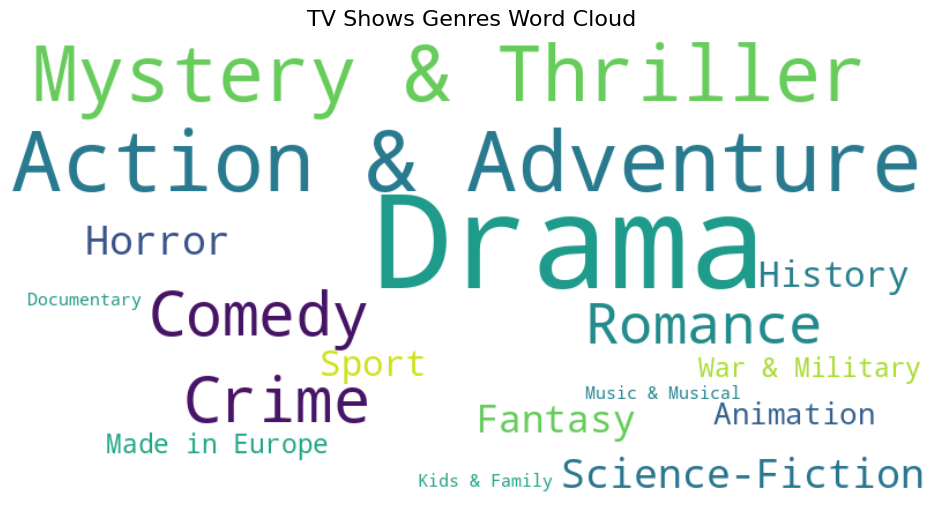

In [ ]:
#Let's Visvalize movies genres using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Convert genre counts to dictionary
genre_dict = genre_counts_movies.to_dict()

# Generate WordCloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres Word Cloud", fontsize=16)
plt.show()

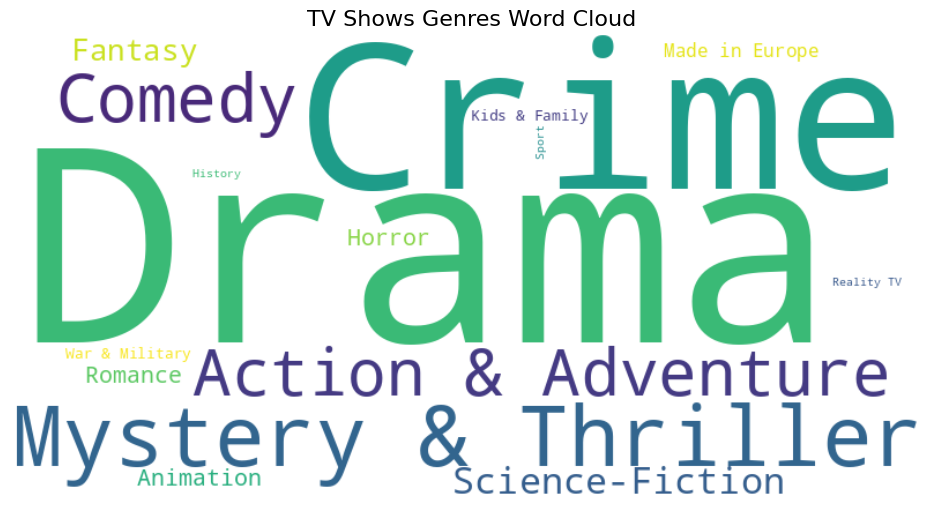

In [ ]:
#Let's Visvalize tv shows genres using word cloud

# Convert genre counts to dictionary
genre_dict = genre_counts.to_dict()

# Generate WordCloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Genres Word Cloud", fontsize=16)
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Clean and split services
def clean_services(x):
    if pd.isna(x):
        return []
    # Remove unwanted characters
    x = x.replace("[", "").replace("]", "").replace("'", "").replace('"', "")
    # Split by comma and strip spaces
    return [s.strip() for s in x.split(",") if s.strip()]

tv_shows_df["services_split"] = tv_shows_df["Streaming_Services"].apply(clean_services)

# Flatten all service lists
all_services = pd.Series([s for sublist in tv_shows_df["services_split"] for s in sublist])

# Count occurrences
service_counts_tv = all_services.value_counts()

print(service_counts_tv)


Crunchyroll                        100
JustWatch                          100
Amazon Video                        31
Apple TV                            25
Zee5                                20
Amazon Prime Video                  18
Amazon Prime Video with Ads         18
Netflix                             18
Bookmyshow                          15
JioHotstar                           6
Plex Player                          6
Sony Pictures Amazon Channel         2
aha                                  2
VI movies and tv                     2
Hungama Play                         2
ManoramaMax                          1
Lionsgate Play Apple TV Channel      1
Lionsgate Play                       1
Lionsgate Play Amazon Channel        1
ManoramaMAX Amazon Channel           1
JustWatchTV                          1
Filmzie                              1
Sony Liv                             1
ShemarooMe                           1
Name: count, dtype: int64


In [ ]:
# Clean and split services
def clean_services(x):
    if pd.isna(x):
        return []
    # Remove unwanted characters
    x = x.replace("[", "").replace("]", "").replace("'", "").replace('"', "")
    # Split by comma and strip spaces
    return [s.strip() for s in x.split(",") if s.strip()]

movies_df["services_split"] = movies_df["Streaming_Services"].apply(clean_services)

# Flatten all service lists
all_services = pd.Series([s for sublist in movies_df["services_split"] for s in sublist])

# Count occurrences
service_counts_movies = all_services.value_counts()

print(service_counts_movies)


Crunchyroll                        105
JustWatch                          105
Amazon Video                        33
Apple TV                            26
Amazon Prime Video with Ads         20
Amazon Prime Video                  20
Zee5                                20
Netflix                             18
Bookmyshow                          16
JioHotstar                           6
Plex Player                          6
Sony Pictures Amazon Channel         2
aha                                  2
VI movies and tv                     2
Hungama Play                         2
ManoramaMax                          1
Lionsgate Play Apple TV Channel      1
Lionsgate Play                       1
Lionsgate Play Amazon Channel        1
ManoramaMAX Amazon Channel           1
JustWatchTV                          1
Filmzie                              1
Sony Liv                             1
ShemarooMe                           1
Name: count, dtype: int64


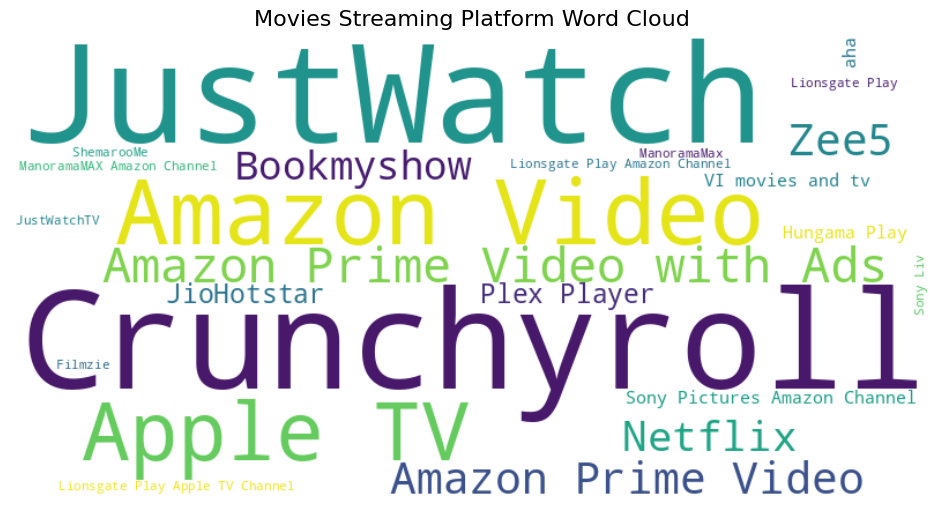

In [ ]:
#Let's Visvalize movies streaming services using word cloud
# Convert genre counts to dictionary
streaming_dict = service_counts_movies.to_dict()

# Generate WordCloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(streaming_dict)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Movies Streaming Platform Word Cloud", fontsize=16)
plt.show()

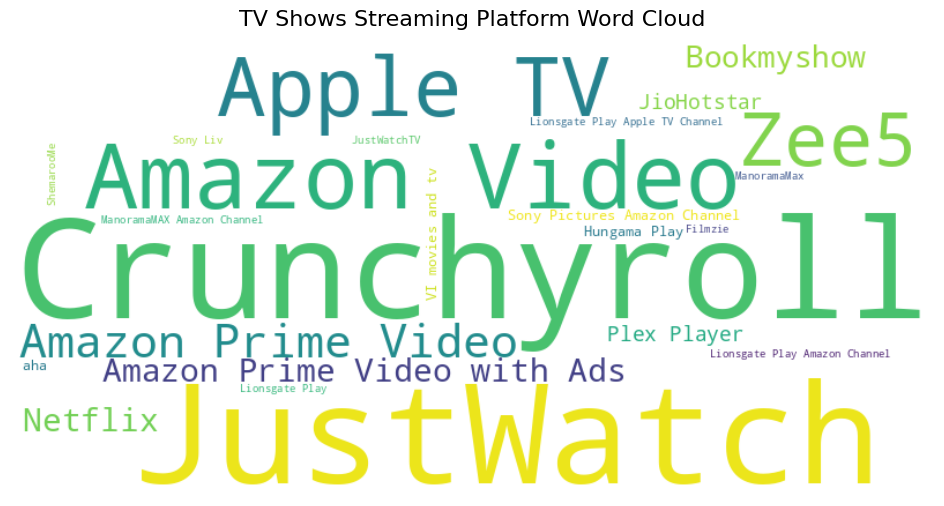

In [ ]:
#Let's Visvalize TV Shows streaming services using word cloud
# Convert genre counts to dictionary
streaming_dict_tv = service_counts_tv.to_dict()

# Generate WordCloud
wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wc.generate_from_frequencies(streaming_dict_tv)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("TV Shows Streaming Platform Word Cloud", fontsize=16)
plt.show()

In [ ]:
movies_df

URL     Movie_Title  \
0     https://www.justwatch.com/in/movie/28-days-later   28 Days Later   
1    https://www.justwatch.com/in/movie/28-years-later  28 Years Later   
2          https://www.justwatch.com/in/movie/365-days        365 Days   
3              https://www.justwatch.com/in/movie/3bhk            3Bhk   
4        https://www.justwatch.com/in/movie/aashiqui-2      Aashiqui 2   
..                                                 ...             ...   
100           https://www.justwatch.com/in/movie/war-2           War 2   
101        https://www.justwatch.com/in/movie/war-2019        War 2019   
102         https://www.justwatch.com/in/movie/warfare         Warfare   
103    https://www.justwatch.com/in/movie/weapons-2025    Weapons 2025   
104           https://www.justwatch.com/in/movie/zebra           Zebra   

    Release_Year                                         Genres  \
0           2002                                            NaN   
1           2025                                            NaN   
2           2020                 Romance, Drama, Made in Europe   
3           2025                                            NaN   
4           2013                Drama, Romance, Music & Musical   
..           ...                                            ...   
100         2025         Mystery & Thriller, Action & Adventure   
101         2019         Action & Adventure, Mystery & Thriller   
102         2025      War & Military, Action & Adventure, Drama   
103         2025                     Horror, Mystery & Thriller   
104         2024  Mystery & Thriller, Crime, Action & Adventure   

                                    Streaming_Services   Runtime Age_Rating  \
0    ['Apple TV', 'Amazon Prime Video', 'Sony Pictu...  1h 53min          A   
1    ['Apple TV', 'Zee5', 'Amazon Video', 'Crunchyr...  1h 55min          A   
2              ['Netflix', 'Crunchyroll', 'JustWatch']  1h 54min          A   
3    ['Amazon Prime Video', 'Amazon Prime Video wit...  2h 19min          U   
4                         ['Crunchyroll', 'JustWatch']  2h 12min          U   
..                                                 ...       ...        ...   
100         ['Bookmyshow', 'Crunchyroll', 'JustWatch']  2h 53min      UA16+   
101  ['Apple TV', 'Amazon Prime Video', 'Amazon Pri...  2h 32min         UA   
102  ['Amazon Prime Video', 'Amazon Prime Video wit...  1h 35min          A   
103                       ['Crunchyroll', 'JustWatch']   2h 9min          A   
104                       ['Crunchyroll', 'JustWatch']  2h 44min      UA13+   

    Production_Countries IMDB_Rating  Rating     Votes  \
0                    NaN   7.5 (514k     7.5  514000.0   
1                    NaN   6.7 (115k     6.7  115000.0   
2                 Poland   3.3 (105k     3.3  105000.0   
3                  India   7.3 (1.9k     7.3    1900.0   
4                  India    7.1 (36k     7.1   36000.0   
..                   ...         ...     ...       ...   
100                India    6.0 (27k     6.0   27000.0   
101                India    6.6 (37k     6.6   37000.0   
102                  NaN    7.2 (74k     7.2   74000.0   
103        United States    7.8 (76k     7.8   76000.0   
104                India   7.1 (3.4k     7.1    3400.0   

                                        genres_split  \
0                                                 []   
1                                                 []   
2                   [Romance, Drama, Made in Europe]   
3                                                 []   
4                  [Drama, Romance, Music & Musical]   
..                                               ...   
100         [Mystery & Thriller, Action & Adventure]   
101         [Action & Adventure, Mystery & Thriller]   
102      [War & Military, Action & Adventure, Drama]   
103                     [Horror, Mystery & Thriller]   
104  [Mystery & Thriller, Crime, Action & Adventure]   

                                      

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
# Export Movies DataFrame
movies_df.to_csv("movies_data.csv", index=False, encoding="utf-8")

# Export TV Shows DataFrame
tv_shows_df.to_csv("tv_shows_data.csv", index=False, encoding="utf-8")


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***